#### The aim of this project is to predict wether the mushrooms are edible or poisonous based on the data given. Its a classifiaction problem. There are two classes in the output variable: Edible and poisonous.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("mushroom.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises%3F                  8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  5644 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

Only stalk-root has 2480 missing data

In [8]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [9]:
#Filling the missing values of stalk-root by 'r'.(As the count of 'r' is very low)
df['stalk-root'].fillna(value='r',inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises%3F                  8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [11]:
df['stalk-root'].value_counts()

b    3776
r    2672
e    1120
c     556
Name: stalk-root, dtype: int64

In [12]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [13]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [14]:
df['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [15]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [16]:
df['bruises%3F'].value_counts()

f    4748
t    3376
Name: bruises%3F, dtype: int64

In [17]:
df['odor'].value_counts()

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [18]:
df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [19]:
df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [20]:
df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [21]:
df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [22]:
df['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [23]:
df['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [24]:
df['stalk-color-below-ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

In [25]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [26]:
df['veil-color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

In [27]:
df['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

In [28]:
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [29]:
df['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
u      48
b      48
o      48
y      48
Name: spore-print-color, dtype: int64

In [30]:
df['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [31]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [32]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

## Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
#Label encoding for columns having upto 4 categories
df['class']=le.fit_transform(df['class'])

In [35]:
le.classes_

array(['e', 'p'], dtype=object)

In [36]:
df['ring-number']=le.fit_transform(df['ring-number'])
df['veil-color']=le.fit_transform(df['veil-color'])
df['stalk-surface-above-ring']=le.fit_transform(df['stalk-surface-above-ring'])
df['stalk-shape']=le.fit_transform(df['stalk-shape'])
df['gill-size']=le.fit_transform(df['gill-size'])
df['gill-spacing']=le.fit_transform(df['gill-spacing'])
df['gill-attachment']=le.fit_transform(df['gill-attachment'])
df['bruises%3F']=le.fit_transform(df['bruises%3F'])
df['cap-surface']=le.fit_transform(df['cap-surface'])

## EDA

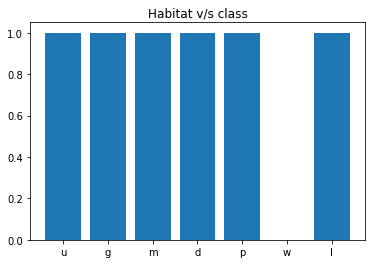

In [37]:
plt.bar(df['habitat'],df['class'])
plt.title("Habitat v/s class")
plt.show()

From the above bar plot, habitat w is poisonous. Rest all are edible

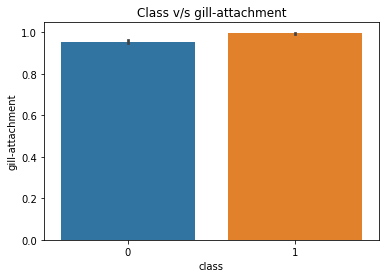

In [38]:
sns.barplot(df['class'],df['gill-attachment'])
plt.title('Class v/s gill-attachment')
plt.show()

From the above barplot, we can see that class 1 mushrooms have more gill-attachement.

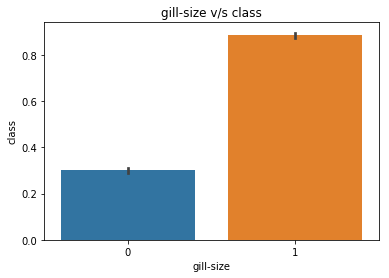

In [39]:
sns.barplot(df['gill-size'],df['class'])
plt.title("gill-size v/s class")
plt.show()

From the above barplot, it can be seen that gill-size of category 1, is more edible.

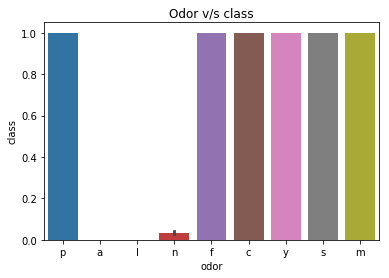

In [40]:
sns.barplot(df['odor'],df['class'])
plt.title("Odor v/s class")
plt.show()

From the above barplot, it can be seen that apart from odor classes a,l,n all others are edible

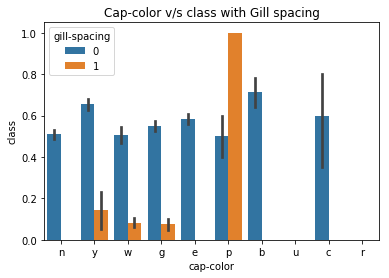

In [41]:
sns.barplot(df['cap-color'],df['class'],hue=df['gill-spacing'])
plt.title("Cap-color v/s class with Gill spacing")
plt.show()


From the above graph, we can observe that cap-color with class 'p' and gill spacing of '1' are most edible ones.

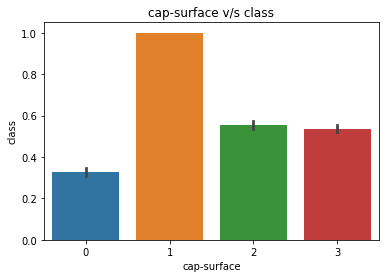

In [42]:
sns.barplot(df['cap-surface'],df['class'])
plt.title("cap-surface v/s class")
plt.show()

From the above graph, we can see that cap-surface with class 1 are the most edible as compared to other classes

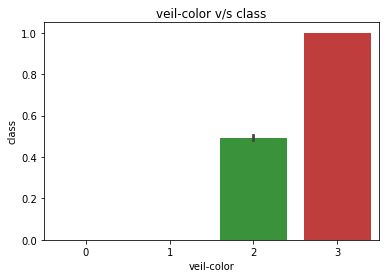

In [43]:
sns.barplot(df['veil-color'],df['class'])
plt.title("veil-color v/s class")
plt.show()

From the above barplot, it can be seen that veil-color with class 3 are the most edible mushrooms.

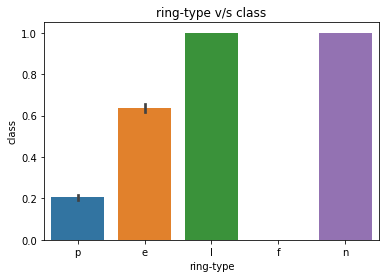

In [44]:
sns.barplot(df['ring-type'],df['class'])
plt.title("ring-type v/s class")
plt.show()

From the above barplot, it can be seen that ring-type with classes 'n' and 'l' are the edible ones and 'f' is poisonous one.

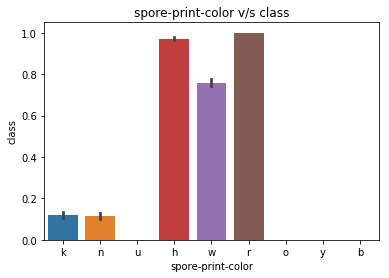

In [45]:
sns.barplot(df['spore-print-color'],df['class'])
plt.title("spore-print-color v/s class")
plt.show()

From the above barplot, we can see that spore-print-color with classes 'h','r' are more edible. Also class 'w' may be edible.

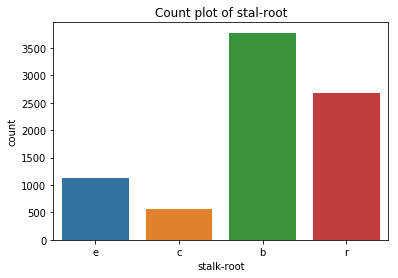

In [46]:
sns.countplot(df['stalk-root'])
plt.title("Count plot of stal-root")
plt.show()


From the above count plot it can be observed that stalk-root class 'b' has the highest and class 'c' has the lowest count.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null int32
cap-color                   8124 non-null object
bruises%3F                  8124 non-null int32
odor                        8124 non-null object
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null object
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null int32
ring-number                 8124 non-null int32
ring-type           

In [48]:
df.drop(['veil-type'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null int32
cap-color                   8124 non-null object
bruises%3F                  8124 non-null int32
odor                        8124 non-null object
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null object
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null int32
ring-number                 8124 non-null int32
ring-type                   8124 non-null object
spore-print-color   

In [49]:
#Using Dummies for other columns
status=pd.get_dummies(df['habitat'],drop_first=True,prefix='hab')
df=pd.concat([df,status],axis=1)
df.drop('habitat',axis=1,inplace=True)
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,ring-type,spore-print-color,population,class,hab_g,hab_l,hab_m,hab_p,hab_u,hab_w
0,x,2,n,1,p,1,0,1,k,0,...,p,k,s,1,0,0,0,0,1,0
1,x,2,y,1,a,1,0,0,k,0,...,p,n,n,0,1,0,0,0,0,0
2,b,2,w,1,l,1,0,0,n,0,...,p,n,n,0,0,0,1,0,0,0
3,x,3,w,1,p,1,0,1,n,0,...,p,k,s,1,0,0,0,0,1,0
4,x,2,g,0,n,1,1,0,k,1,...,e,n,a,0,1,0,0,0,0,0


In [50]:
df.select_dtypes(include='object').columns

Index(['cap-shape', 'cap-color', 'odor', 'gill-color', 'stalk-root',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population'],
      dtype='object')

In [51]:
status=pd.get_dummies(df['cap-shape'],prefix='Cap_shape',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('cap-shape',axis=1,inplace=True)

status=pd.get_dummies(df['cap-color'],prefix='cap_color',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('cap-color',axis=1,inplace=True)

status=pd.get_dummies(df['odor'],prefix='odor',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('odor',axis=1,inplace=True)

status=pd.get_dummies(df['gill-color'],prefix='gill_color',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('gill-color',axis=1,inplace=True)

status=pd.get_dummies(df['stalk-root'],prefix='stalk_root',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('stalk-root',axis=1,inplace=True)

status=pd.get_dummies(df['stalk-surface-below-ring'],prefix='ss_br',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('stalk-surface-below-ring',axis=1,inplace=True)

status=pd.get_dummies(df['stalk-color-above-ring'],prefix='sc_ar',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('stalk-color-above-ring',axis=1,inplace=True)

status=pd.get_dummies(df['stalk-color-below-ring'],prefix='sc_br',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('stalk-color-below-ring',axis=1,inplace=True)

status=pd.get_dummies(df['ring-type'],prefix='ring_type',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('ring-type',axis=1,inplace=True)

status=pd.get_dummies(df['spore-print-color'],prefix='spc',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('spore-print-color',axis=1,inplace=True)

status=pd.get_dummies(df['population'],prefix='popl',drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('population',axis=1,inplace=True)

In [52]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

## Define X and y

In [53]:
X=df.drop('class',axis=1)
X.head()

,cap-surface,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-surface-above-ring,veil-color,ring-number,hab_g,...,spc_o,spc_r,spc_u,spc_w,spc_y,popl_c,popl_n,popl_s,popl_v,popl_y
0,2,1,1,0,1,0,2,2,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,0,0,0,2,2,1,1,...,0,0,0,0,0,0,1,0,0,0
2,2,1,1,0,0,0,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1,1,0,1,0,2,2,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,1,1,0,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y=df['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

## Train_test_split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [56]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [57]:
#fit the model to train data
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
#train data
y_pred_train=lgr.predict(X_train)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [60]:
accuracy_score(y_train,y_pred_train)

0.9995896594173164

In [61]:
confusion_matrix(y_train,y_pred_train)

array([[2509,    0],
       [   2, 2363]], dtype=int64)

In [62]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2509
           1       1.00      1.00      1.00      2365

   micro avg       1.00      1.00      1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874



In [63]:
#test data
y_pred_test=lgr.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred_test)

0.9981538461538462

In [65]:
confusion_matrix(y_test,y_pred_test)

array([[1699,    0],
       [   6, 1545]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00      1551

   micro avg       1.00      1.00      1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [68]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
y_pred_train=nb.predict(X_train)

In [70]:
accuracy_score(y_train,y_pred_train)

0.963684858432499

In [71]:
confusion_matrix(y_train,y_pred_train)

array([[2333,  176],
       [   1, 2364]], dtype=int64)

In [72]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2509
           1       0.93      1.00      0.96      2365

   micro avg       0.96      0.96      0.96      4874
   macro avg       0.97      0.96      0.96      4874
weighted avg       0.97      0.96      0.96      4874



In [73]:
y_pred_test=nb.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred_test)

0.9553846153846154

In [75]:
confusion_matrix(y_test,y_pred_test)

array([[1559,  140],
       [   5, 1546]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1699
           1       0.92      1.00      0.96      1551

   micro avg       0.96      0.96      0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



## Serialization

In [77]:
import pickle

In [78]:
#Saving the model
mushroom_model = pickle.dumps(nb) 

In [79]:
#Load the model whenever required
nb_from_pickle = pickle.loads(mushroom_model) 

In [80]:
#Use model for prediction
nb_from_pickle.predict(X_test)

array([1, 0, 1, ..., 1, 0, 0])